<a href="https://colab.research.google.com/github/JuniorTorresMTJ/MachineLearning_Algorithms/blob/master/Prevendo_Pre%C3%A7o_Casas_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Essa Análise tem como objetivo utilizar 

##Importando as Bibliotecas

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression

#Importando os Dados

No proprio scikit-learn já está disponível o dataset Boston.

In [3]:
# O dataset boston já está disponível no scikit-learn. Precisamos apenas carregá-lo.
from sklearn.datasets import load_boston
boston = load_boston()

Vamos verificar a quantidade de linhas x colunas deste dataset


In [4]:
boston.data.shape

(506, 13)

No proprio scikit-learn tem uma breve descrição do dataset, vamos verificar:

In [5]:
# Descrição do Dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Vamos verificar todas as colunas desse dataset

In [6]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


agora vamos transforma esse dataset em um dataframe e verificar as primeras 5 linhas

In [7]:
# Convertendo o dataset em um DataFrame pandas
df = pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


conforme vemos acima, os nomes da colunas estão em numeral, dificultando o entenimento dos dados, vamos nomear os nomes das colunas

In [8]:
# Convertendo o título das colunas
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
# boston.target é uma array com o preço das casas 
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

Target é a onde estão os preços da casas, então vamos colocar esses dados no Dataframe

In [10]:
# Adicionando o preço da casa ao DataFrame
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Y - variável dependente (preço das casas em Boston) <br>
X - variáveis independentes ou explanatórias (todas as outras caracterísricas da casa)

#Aplicando Regressão sem Dividir o Dataset

In [11]:
X = df.drop('PRICE', axis = 1)

In [12]:
Y = df.PRICE

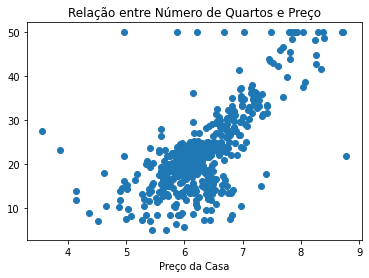

In [13]:
plt.scatter(df.RM, Y)
plt.xlabel("Média do Número de Quartos por Casa")
plt.xlabel("Preço da Casa")
plt.title("Relação entre Número de Quartos e Preço")
plt.show()

Veja no gráfico acima, temos um relação positiva, Quanto maior o número de Quartos, maior o preço da casa e faz sentido ser assim.

In [14]:
regr = LinearRegression()

In [15]:
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Agora iremos fazer uma regressão linear multipla, pois temos 13 variáveis preditoras.

In [16]:
# Coeficientes
print("Coeficiente: ", regr.intercept_)
print("Número de Coeficientes: ", len(regr.coef_))

Coeficiente:  36.45948838508978
Número de Coeficientes:  13


Vamos fazer as Previsões de todos os valores de X. (não é o ideal, pois são dados que ele já foi treinado).

Para isso, precisamos dividir o dataset em treino e teste, mas veremos isso mais adiante.

In [17]:
regr.predict(X)

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
       18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
       19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603,
       12.52385753, 17.67103669, 15.83288129, 13.80628535, 15.67833832,
       13.38668561, 15.46397655, 14.70847428, 19.54737285, 20.8764282 ,
       11.45511759, 18.05923295,  8.81105736, 14.28275814, 13.70675891,
       23.81463526, 22.34193708, 23.10891142, 22.91502612, 31.35762569,
       34.21510225, 28.02056414, 25.20386628, 24.60979273, 22.94149176,
       22.09669817, 20.42320032, 18.03655088,  9.10655377, 17.20607751,
       21.28152535, 23.97222285, 27.6558508 , 24.04901809, 15.3618477 ,
       31.15264947, 24.85686978, 33.10919806, 21.77537987, 21.08493555,
       17.8725804 , 18.51110208, 23.98742856, 22.55408869, 23.37308644,
       30.36148358, 25.53056512, 21.11338564, 17.42153786, 20.78

Vamos ver um gráfico de distribuição e ver como ficou.

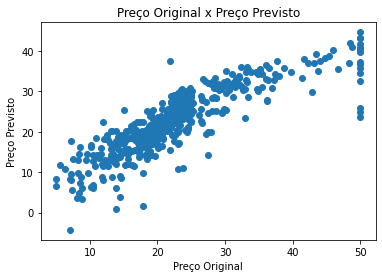

In [18]:
# Comparando preços originais x preços previstos
plt.scatter(df.PRICE, regr.predict(X))
plt.xlabel("Preço Original")
plt.ylabel("Preço Previsto")
plt.title("Preço Original x Preço Previsto")
plt.show()

Veja, temos um relação, mas teve alguns erros por causa que formou uma coluna na direita.

Vamos calcular a taxa de erro.

In [19]:
# Vamos calcular o MSE (Mean Squared Error)
mse1 = np.mean((df.PRICE - regr.predict(X)) ** 2)
print(mse1)

21.89483118172921


Vamos verificar a taxa de erro apenas com uma váriavel:

In [20]:
regr = LinearRegression()
regr.fit(X[['PTRATIO']], df.PRICE)
mse2 = np.mean((df.PRICE - regr.predict(X[['PTRATIO']])) ** 2)
print(mse2)

62.65220001376923


Considerando apenas uma variável o MSE aumentou, isso nos mostra que não é bom usar apenas uma váriavel para fazer  previsão do valor das casas.

#Dividindo o Dataset em 2

Na prática, não implementamos regressão linear em todo o dataset, temos que dividir o dataset em treino e teste. 

Assim, treinamos os dados de treino e verificamos com o de teste.

Vamos dividir o data# Dividindo X em dados de treino e de testeset, para isso vamos fazer um slicing do dataset

In [21]:
# Dividindo X em dados de treino e de teste
X_treino = X[:-50]
X_teste = X[-50:]

# Dividindo Y em dados de treino e de teste
Y_treino = df.PRICE[:-50]
Y_teste = df.PRICE[-50:]


Fizemos o Slice, agora vamos verificar o shape de cada


In [22]:
# Imprimindo o shape dos datasets
print(X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape)

(456, 13) (50, 13) (456,) (50,)


Essa maneira acima é a forma manual de dividir os dados, mas o ideal é ser de forma randominca, pois de maneira manual pode alterar os dados.

Outra maneira é fazer é de uma foma randomica

In [23]:
from sklearn.model_selection import train_test_split

# Dividindo X e Y em dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, df.PRICE, test_size = 0.33, random_state = 5)
#o test_size é o tamanho do dataset de teste, geralmente utilizamos 30% para teste e 70% para o treino, mas não é uma regra

Vamos verificar o shapes do dataset, desta vez os dados são randomicos.


In [24]:
# Imprimindo o shape dos datasets
print(X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape)

(339, 13) (167, 13) (339,) (167,)


In [25]:
# Construindo um modelo de regressão
regr = LinearRegression()

Agora vamos treinar apenas utilizando os datasets de treino e não mais o dataset inteiro como feito anteriormente

In [26]:
# Treinando o modelo
regr.fit(X_treino, Y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Fazendo as previsões com dados de treino e teste, mas o ideal é apenas no de teste.

vamos criar váriaveis para armazenar as previsões

In [27]:
# Definindo os dados de treino e teste
pred_treino = regr.predict(X_treino)
pred_teste = regr.predict(X_teste)

Vamos criar um Gráfico de resíduo para verficar os dados e olhar se tem overfit ou underfit

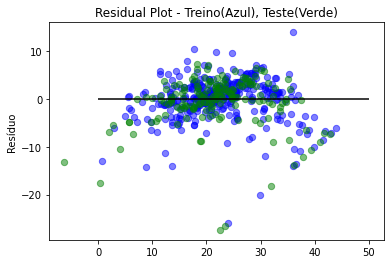

In [28]:
# Comparando preços originais x preços previstos
plt.scatter(regr.predict(X_treino), regr.predict(X_treino) - Y_treino, c = 'b', s = 40, alpha = 0.5)
plt.scatter(regr.predict(X_teste), regr.predict(X_teste) - Y_teste, c = 'g', s = 40, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.ylabel("Resíduo")
plt.title("Residual Plot - Treino(Azul), Teste(Verde)")
plt.show()